In [1]:
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras import regularizers
from sklearn.svm import SVC
from sklearn import svm

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.inspection import DecisionBoundaryDisplay

In [3]:
ECG_trn = pickle.load(open('ECG5000/ECG5000_train.pickle', "rb"), encoding='latin1')
ECG_vld = pickle.load(open('ECG5000/ECG5000_validation.pickle', "rb"), encoding='latin1')

In [4]:
X_trn = np.delete(ECG_trn, 0, axis = 1)
X_vld = np.delete(ECG_vld, 0, axis = 1)
y_trn = ECG_trn[:, 0].reshape(-1)
y_vld = ECG_vld[:, 0].reshape(-1)


In [5]:
print(y_trn.shape)
print(X_trn.shape)
print(X_vld.shape)
print(y_vld.shape)

(500,)
(500, 140)
(1500, 140)
(1500,)


In [6]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_trn)
X_vld_scaled = scaler.transform(X_vld)

In [7]:
clf = svm.SVC(class_weight='balanced', kernel='rbf', C=10, gamma=0.001)

In [8]:
clf.fit(X_train_scaled, y_trn)

SVC(C=10, class_weight='balanced', gamma=0.001)

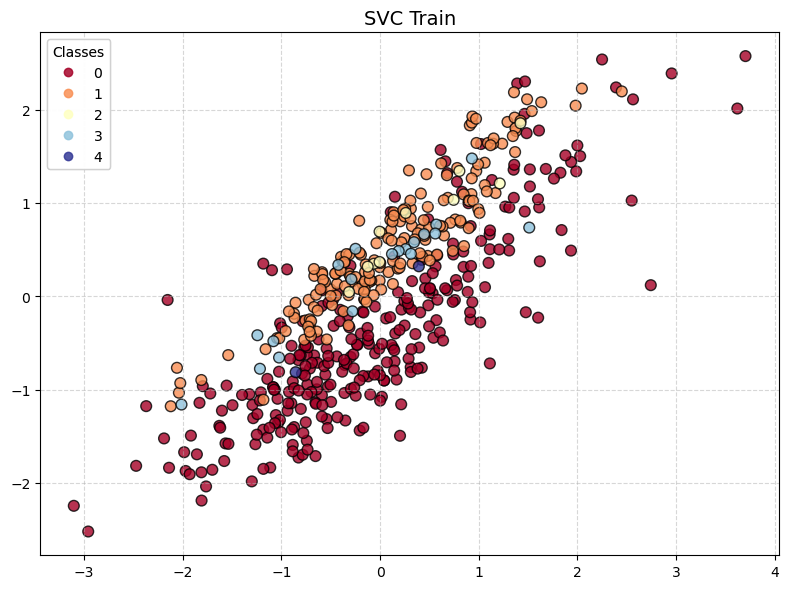

In [9]:

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X_train_scaled[:, 0],
    X_train_scaled[:, 1],
    c=y_trn,
    cmap=plt.cm.RdYlBu,
    edgecolors='k',
    alpha=0.8,
    s=60
)

# Add labels and title
plt.title("SVC Train", fontsize=14)

# Create a legend for classes
legend1 = plt.legend(*scatter.legend_elements(), title="Classes")
plt.gca().add_artist(legend1)

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

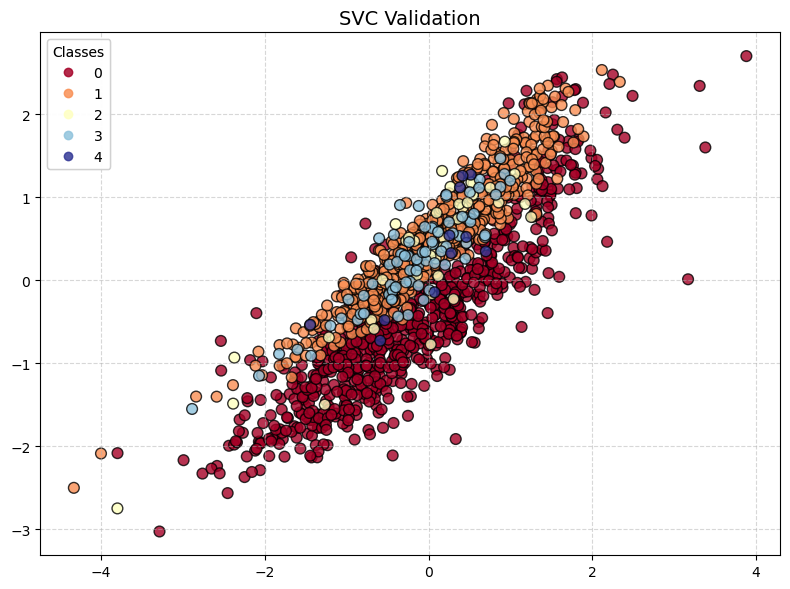

In [10]:

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X_vld_scaled[:, 0],
    X_vld_scaled[:, 1],
    c=y_vld,
    cmap=plt.cm.RdYlBu,
    edgecolors='k',
    alpha=0.8,
    s=60
)

# Add labels and title
plt.title("SVC Validation", fontsize=14)

# Create a legend for classes
legend1 = plt.legend(*scatter.legend_elements(), title="Classes")
plt.gca().add_artist(legend1)

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [11]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn import svm
import numpy as np

# Define your parameter distribution
param_dist = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'degree': [2, 3, 4],                     
    'gamma': [0.01, 0.001],
    'coef0': [0.0, 0.1, 0.5],
    'shrinking': [True, False],
    'tol': [1e-3, 1e-4],
    'class_weight': ['balanced'],
    'decision_function_shape': ['ovo', 'ovr']
}

# Initialize the model
svc = svm.SVC()

# Create the randomized search object
random_search = RandomizedSearchCV(
    estimator=svc,
    param_distributions=param_dist,
    n_iter=100,             
    cv=5,                   
    verbose=2,
    random_state=42,
    n_jobs=-1               
)

# Fit the randomized search
random_search.fit(X_train_scaled, y_trn)

# Best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\samsm\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'tol': 0.001, 'shrinking': True, 'kernel': 'poly', 'gamma': 0.01, 'degree': 3, 'decision_function_shape': 'ovr', 'coef0': 0.0, 'class_weight': 'balanced', 'C': 10}
Best Score: 0.9479999999999998


In [12]:
y_pred = clf.predict(X_vld_scaled)

In [13]:
accuracy = accuracy_score(y_vld, y_pred)
precision = precision_score(y_vld, y_pred, average='macro')
recall = recall_score(y_vld, y_pred, average='macro')
f1 = f1_score(y_vld, y_pred, average='macro')
conf_matrix = confusion_matrix(y_vld, y_pred)

In [14]:
print("Accuracy: {:.4f}".format(accuracy))
print("Precision (macro): {:.4f}".format(precision))
print("Recall (macro): {:.4f}".format(recall))
print("F1 Score (macro): {:.4f}".format(f1))
print("Confusion Matrix:")
print(conf_matrix)
cf_matrix = conf_matrix

Accuracy: 0.8960
Precision (macro): 0.6919
Recall (macro): 0.6067
F1 Score (macro): 0.6230
Confusion Matrix:
[[779   0   1   0   1]
 [ 17 501   5  67   0]
 [ 12  11  18   2   0]
 [  4  24   2  44   1]
 [  5   2   0   2   2]]


Text(50.722222222222214, 0.5, 'True Labels')

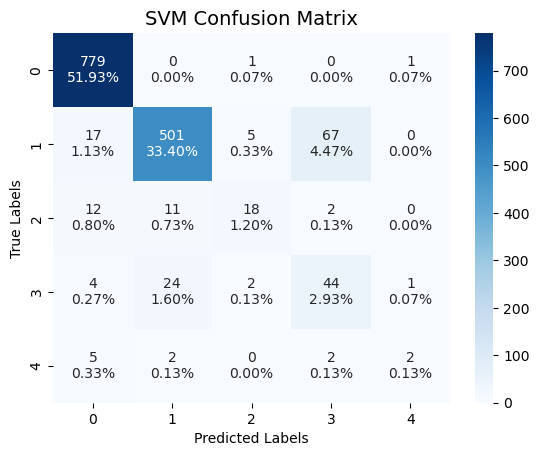

In [15]:
import seaborn as sns

plt.figure(dpi=100)

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}" for v1, v2, in zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(5,5)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

plt.title("SVM Confusion Matrix", fontsize=14)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')